# **Step 1: Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Step 2: Load the Dataset with Correct Encoding**

In [ ]:
# Load CSV file with correct encoding
df = pd.read_csv("/content/superstore_data.csv", encoding='ISO-8859-1')

# Preview the data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Step 3: Basic Information and Exploration**

In [ ]:
# Check the structure
df.info()

# Check for null values
df.isnull().sum()

# Descriptive statstics
df.describe()

# View column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# **Step 4: Data Cleaning**

In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Convert 'Order Date' and 'Ship Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# **Step 5: Add Month and Year Columns**

In [ ]:
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Month-Year'] = df['Order Date'].dt.to_period('M')

# **Step 6: Total Sales and Profit Overview**

In [ ]:
print("Total Sales: ₹", round(df['Sales'].sum(), 2))
print("Total Profit: ₹", round(df['Profit'].sum(), 2))
print("Average Discount: ", round(df['Discount'].mean(), 2))

Total Sales: ₹ 2297200.86
Total Profit: ₹ 286397.02
Average Discount:  0.16


# **Step 7: Total Profit by Sub-Category (Bar Chart)**

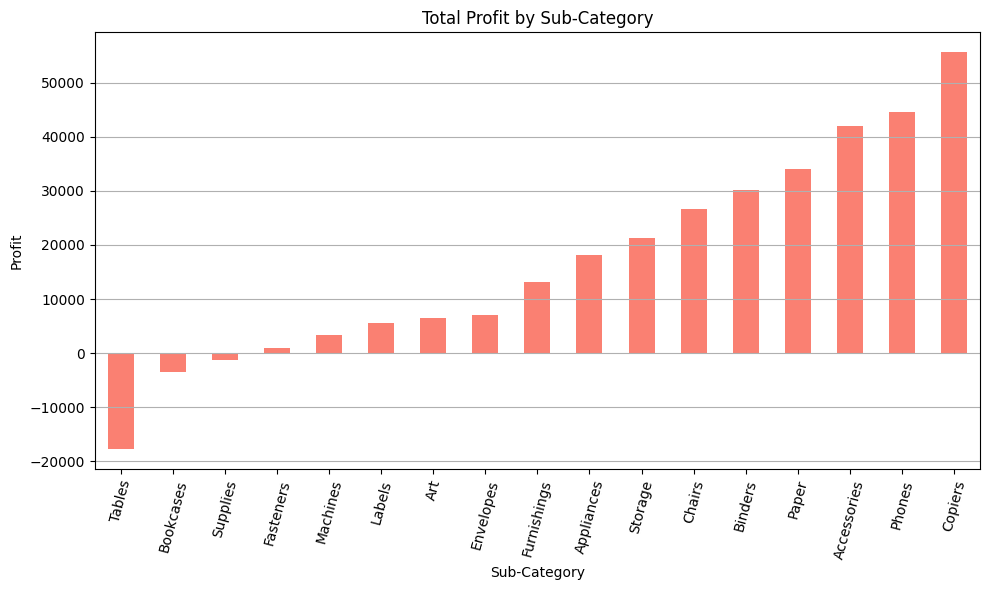

In [ ]:
# Group total profit by sub-category
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()

# Plot as bar chart
plt.figure(figsize=(10,6))
subcat_profit.plot(kind='bar', color='salmon')
plt.title("Total Profit by Sub-Category")
plt.ylabel("Profit")
plt.xlabel("Sub-Category")
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Step 8: Monthly Sales Trend (Line Chart)**

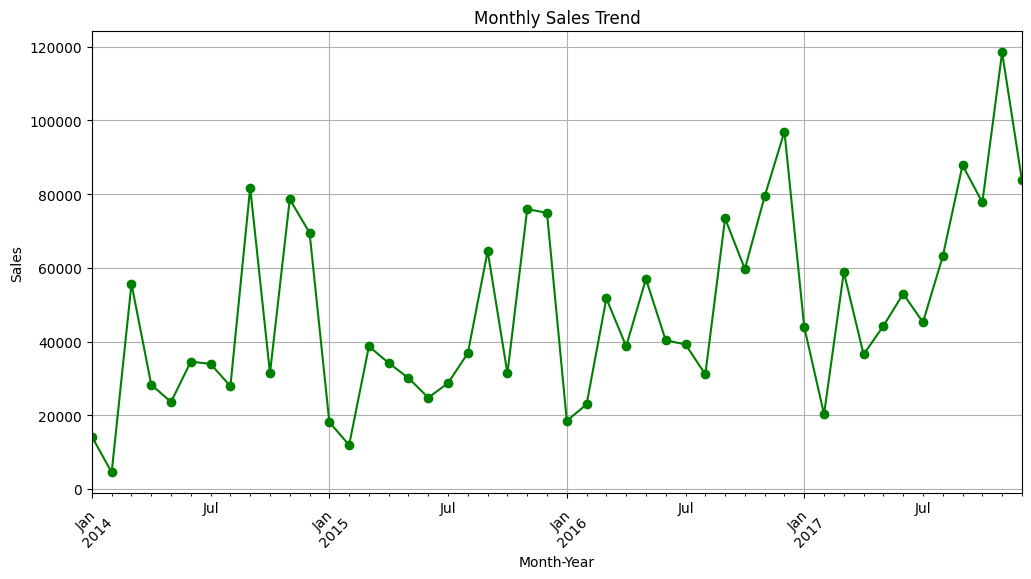

In [ ]:
monthly_sales = df.groupby('Month-Year')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# **Step 9: Profit by Region**

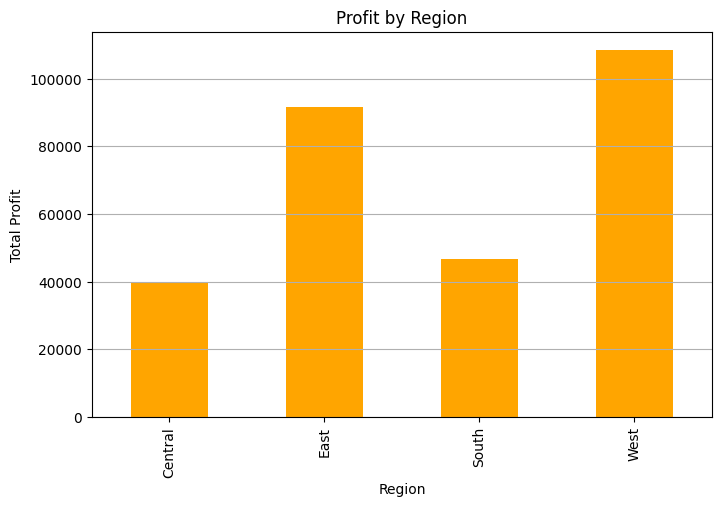

In [ ]:
region_profit = df.groupby('Region')['Profit'].sum()

plt.figure(figsize=(8,5))
region_profit.plot(kind='bar', color='orange')
plt.title("Profit by Region")
plt.ylabel("Total Profit")
plt.xlabel("Region")
plt.grid(axis='y')
plt.show()

# **Step 10: Top 10 Products by Sales**

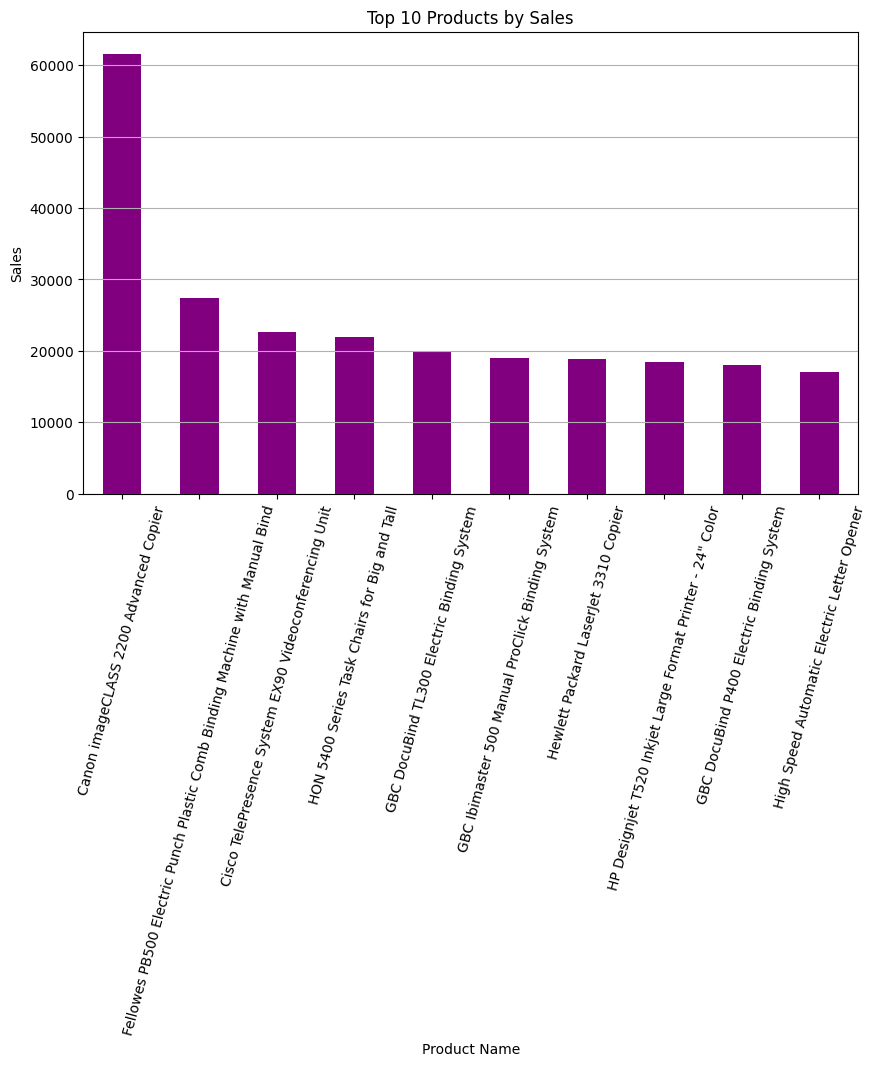

In [ ]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='purple')
plt.title("Top 10 Products by Sales")
plt.ylabel("Sales")
plt.xlabel("Product Name")
plt.xticks(rotation=75)
plt.grid(axis='y')
plt.show()

# **Step 11: Sales by Category**

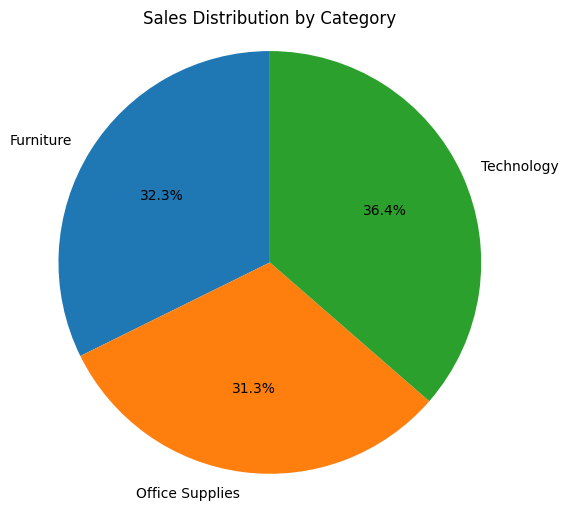

In [ ]:
# Grouping sales by category
category_sales = df.groupby('Category')['Sales'].sum()

# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Sales Distribution by Category')
plt.axis('equal')  # Makes the pie chart a circle
plt.show()


# **Step 12: Pivot Table**

In [ ]:
pivot = df.pivot_table(index='Category', columns='Region', values='Sales', aggfunc='sum')
pivot

Region,Central,East,South,West
Category,,,,
Furniture,163797.1638,208291.204,117298.684,252612.7435
Office Supplies,167026.4150,205516.055,125651.313,220853.2490
Technology,170416.3120,264973.981,148771.908,251991.8320
